Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же коэффициента детерминации $r^2$. Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке.

Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.

In [1]:
import numpy as np                           
from sklearn import cross_validation, metrics, grid_search
import pandas as pd
import matplotlib.pyplot as plt
from skimage import transform
from IPython.display import display, Math


D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear_regressor = LinearRegression() #переназовем для удобства 

In [3]:
from sklearn.datasets import load_boston    # загружаем данные из модуля
boston = load_boston() 

In [4]:
#print(boston.DESCR)     # изучаем характер данных по документации

In [5]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target     #целевой столбец с ценами на жилье         

In [6]:
bos.head()          # выведем небольшую часть данных, чтобы изучить их характер

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data = bos.drop('PRICE', axis = 1)  #разделяем данные на множества объектов и ответов
labels = bos['PRICE']
print('размер выборки ', len(data))

размер выборки  506


In [8]:
data.head() # выводим часть данных, по которым будем обучаться

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
data_train, data_test, labels_train, labels_test = cross_validation.train_test_split(data,
                                            labels, test_size = 0.3) #разбиваем данные на тест и обучение

In [10]:
linear_regressor.fit(data_train, labels_train)      #обучаем модель
predictions = linear_regressor.predict(data_test)

In [11]:
scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = True)
linear_scoring_mse = cross_validation.cross_val_score(linear_regressor, data, labels, scoring = scorer, 
                                                  cv = 10)
print('метрика = mse mean: {}, std = {}'.format(linear_scoring_mse.mean(), linear_scoring_mse.std()))

метрика = mse mean: 34.76309150542213, std = 45.61365330803172


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

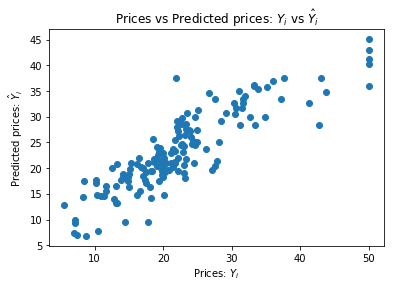

In [12]:
plt.scatter(labels_test, predictions)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

## Изучим зависимости качества обучения от глубины обучающей выборки

In [13]:
def Experimental_deep_function(percent):
    data_part, data_rubbish, labels_part, labels_rubbish = cross_validation.train_test_split(data, labels, test_size = percent)
    scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
    linear_scoring_mae = cross_validation.cross_val_score(linear_regressor, data_part, labels_part, scoring = scorer, 
                                                  cv = 10)
    #print('метрика = mae mean: {}, std = {}'.format(linear_scoring_mae.mean(), linear_scoring_mae.std()))
    
    scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = True)
    linear_scoring_mse = cross_validation.cross_val_score(linear_regressor, data_part, labels_part, scoring = scorer, 
                                                  cv = 10)
    #print('метрика = mse mean: {}, std = {}'.format(linear_scoring_mse.mean(), linear_scoring_mse.std()))
    
    scorer = metrics.make_scorer(metrics.r2_score, greater_is_better = True)
    linear_scoring_r2 = cross_validation.cross_val_score(linear_regressor, data_part, labels_part, scoring = scorer, 
                                                  cv = 10)
    #print('метрика = r2 mean: {}, std = {}'.format(linear_scoring_r2.mean(), linear_scoring_r2.std()))
    
    del data_part, data_rubbish, labels_part, labels_rubbish
    return(linear_scoring_mae.mean(), linear_scoring_mse.mean(), linear_scoring_r2.mean(), linear_scoring_mae.std(),
           linear_scoring_mse.std(), linear_scoring_r2.std())

In [14]:
MAE, MSE, R2 = [], [], []
MAE_STD, MSE_STD, R2_STD = [], [], []
for percent in np.arange(0, 0.75, 0.005):
    MAE.append(Experimental_deep_function(percent)[0])
    MSE.append(Experimental_deep_function(percent)[1])
    R2.append(Experimental_deep_function(percent)[2])
    MAE_STD.append(Experimental_deep_function(percent)[3])
    MSE_STD.append(Experimental_deep_function(percent)[4])
    R2_STD.append(Experimental_deep_function(percent)[5])

Text(0.5,1,'Зависимость функционала ошибки MAE, MSE, $r^2$ от глубины выборки')

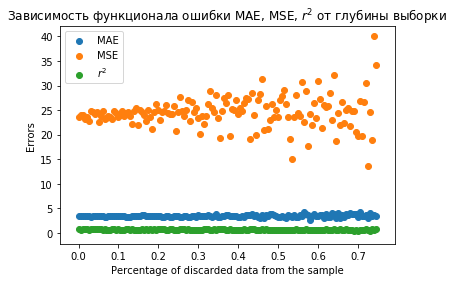

In [15]:
percent = np.arange(0, 0.75, 0.005)

plt.scatter(percent, MAE, label = 'MAE')
plt.scatter(percent, MSE, label = 'MSE')
plt.scatter(percent, R2, label = '$r^2$')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("Errors")
plt.legend()
plt.title("Зависимость функционала ошибки MAE, MSE, $r^2$ от глубины выборки")

Text(0.5,1,'Зависимость функционала ошибки MAE_STD, MSE_STD, $r^2 STD$ от глубины выборки')

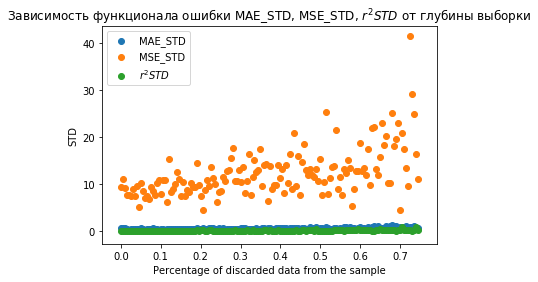

In [16]:
plt.scatter(percent, MAE_STD, label = 'MAE_STD')
plt.scatter(percent, MSE_STD, label = 'MSE_STD')
plt.scatter(percent, R2_STD, label = '$r^2 STD$')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("STD")
plt.legend()
plt.title("Зависимость функционала ошибки MAE_STD, MSE_STD, $r^2 STD$ от глубины выборки")

## MAE

Text(0.5,1,'Зависимость функционала ошибки MAE, MAE_STD от глубины выборки')

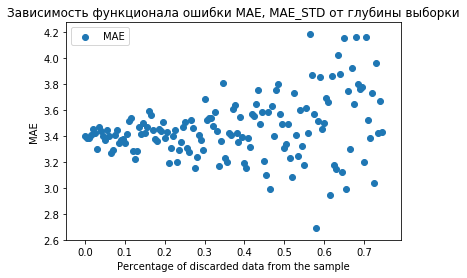

In [17]:
plt.scatter(percent, MAE, label = 'MAE')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("MAE")
plt.legend()
plt.title("Зависимость функционала ошибки MAE, MAE_STD от глубины выборки")

Text(0.5,1,'Зависимость функционала MAE_STD от глубины выборки')

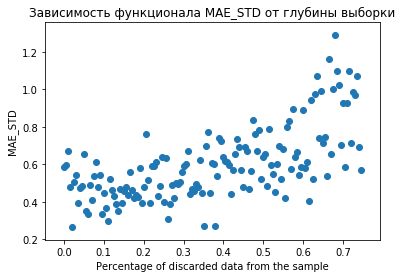

In [18]:
plt.scatter(percent, MAE_STD, label = 'MAE_STD')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("MAE_STD")
plt.title("Зависимость функционала MAE_STD от глубины выборки")

## MSE

Text(0.5,1,'Зависимость функционала ошибки MSE от глубины выборки')

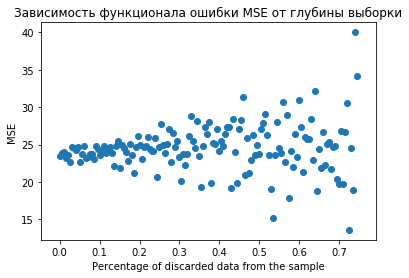

In [19]:
plt.scatter(percent, MSE, label = 'MSE')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("MSE")
plt.title("Зависимость функционала ошибки MSE от глубины выборки")

Text(0.5,1,'Зависимость функционала MSE_STD от глубины выборки')

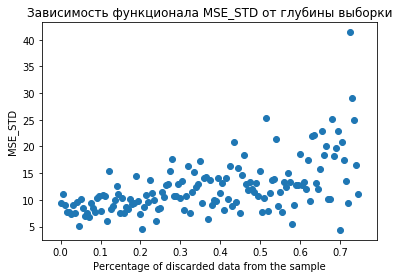

In [20]:
plt.scatter(percent, MSE_STD, label = 'MSE')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("MSE_STD")
plt.title("Зависимость функционала MSE_STD от глубины выборки")

## $R^2$

Text(0.5,1,'Зависимость функционала ошибки R2 от глубины выборки')

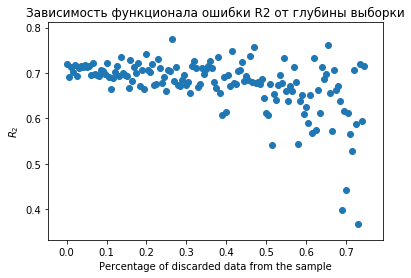

In [21]:
plt.scatter(percent, R2, label = 'R2')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("$R_2$")
plt.title("Зависимость функционала ошибки R2 от глубины выборки")

Text(0.5,1,'Зависимость функционала R2_STD от глубины выборки')

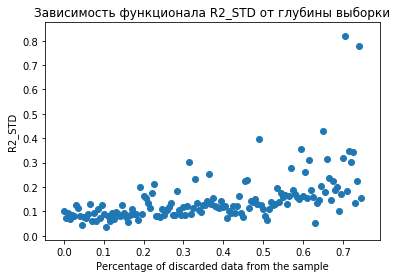

In [22]:
plt.scatter(percent, R2_STD, label = 'MSE')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("R2_STD")
plt.title("Зависимость функционала R2_STD от глубины выборки")

### Вывод

В ходе работы было установлено, что качество решения задачи регрессии падает с уменьшением глубины выборки. Зависисмость функционалов ошибок от глубины выборки представлены в работе выше.

# ДЗ 3 неделя

# Попробуем построить график зависимости ошибки (exp(-S(w) на контроле) от сложности модели (числа признаков) и объема выборки. 

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [74]:
def Experimental_deep_function_3(percent):
    data_part, data_rubbish, labels_part, labels_rubbish = cross_validation.train_test_split(data, labels, test_size = percent)
    
    scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = True)
    linear_scoring_mse = cross_validation.cross_val_score(linear_regressor, data_part, labels_part, scoring = scorer, 
                                                  cv = 10)    
    
    del data_part, data_rubbish, labels_part, labels_rubbish
    return(linear_scoring_mse.mean(), linear_scoring_mse.std())

In [75]:
def MSE_3D(x, y):
    data = bos.drop('PRICE', axis = 1)
    Head = data.keys()
    MSE = np.zeros((len(y), len(x)))
    for i, val_x in enumerate(x):
        for j, val_y in enumerate(y):
            MSE[j][i] = Experimental_deep_function_3(val_y)[0]
        data.drop(Head[i], axis = 1, inplace = True)
    return MSE

(450, 12) (450, 12) (450, 12)
(450, 12) (450, 12) (450, 12)


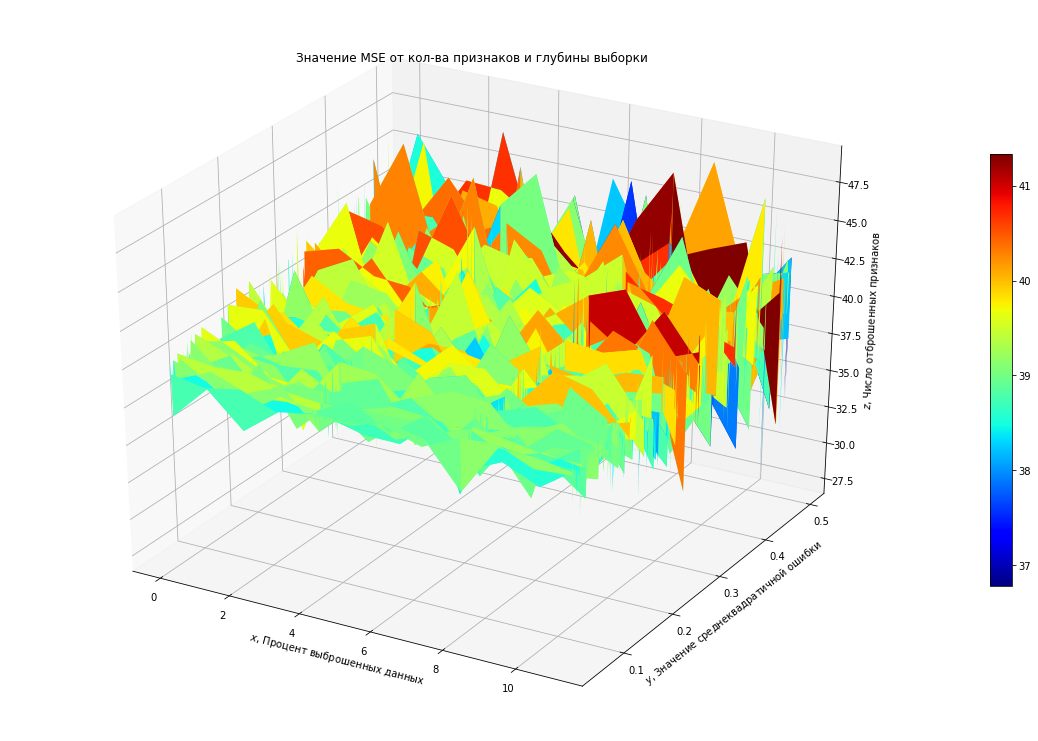

In [76]:
def makeData():
        x = np.arange(len(Head) - 1)
        y = np.arange(0.05, 0.5, 0.001)
        xgrid, ygrid = np.meshgrid(x, y)
        zgrid = MSE_3D(x, y)
        print(xgrid.shape, ygrid.shape, zgrid.shape)
        return xgrid, ygrid, zgrid

# вызов этой функции и дальше рисуем 3D график
x, y, z = makeData()

fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)
#print(xgrid.shape, ygrid.shape, z.shape)
print(x.shape, y.shape, z.shape)
ax.set_title("Значение MSE от кол-ва признаков и глубины выборки")
ax.set_xlabel("$x$, Процент выброшенных данных", fontsize=10)
ax.set_ylabel('$y$, Значение среднеквадратичной ошибки', fontsize=10)
ax.set_zlabel("$z$, Число отброшенных признаков", fontsize=10)
p=ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap=cm.jet)
cb = fig.colorbar(p, shrink=0.6)
plt.show()
fig.savefig("result.png", dpi=100)





### Будем изучать зависимость значения ошибки и его стандартного отклонения от числа признаков 

In [77]:
from seaborn import pairplot

In [78]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
data = bos.drop(['PRICE'], axis = 1)
labels = bos['PRICE']

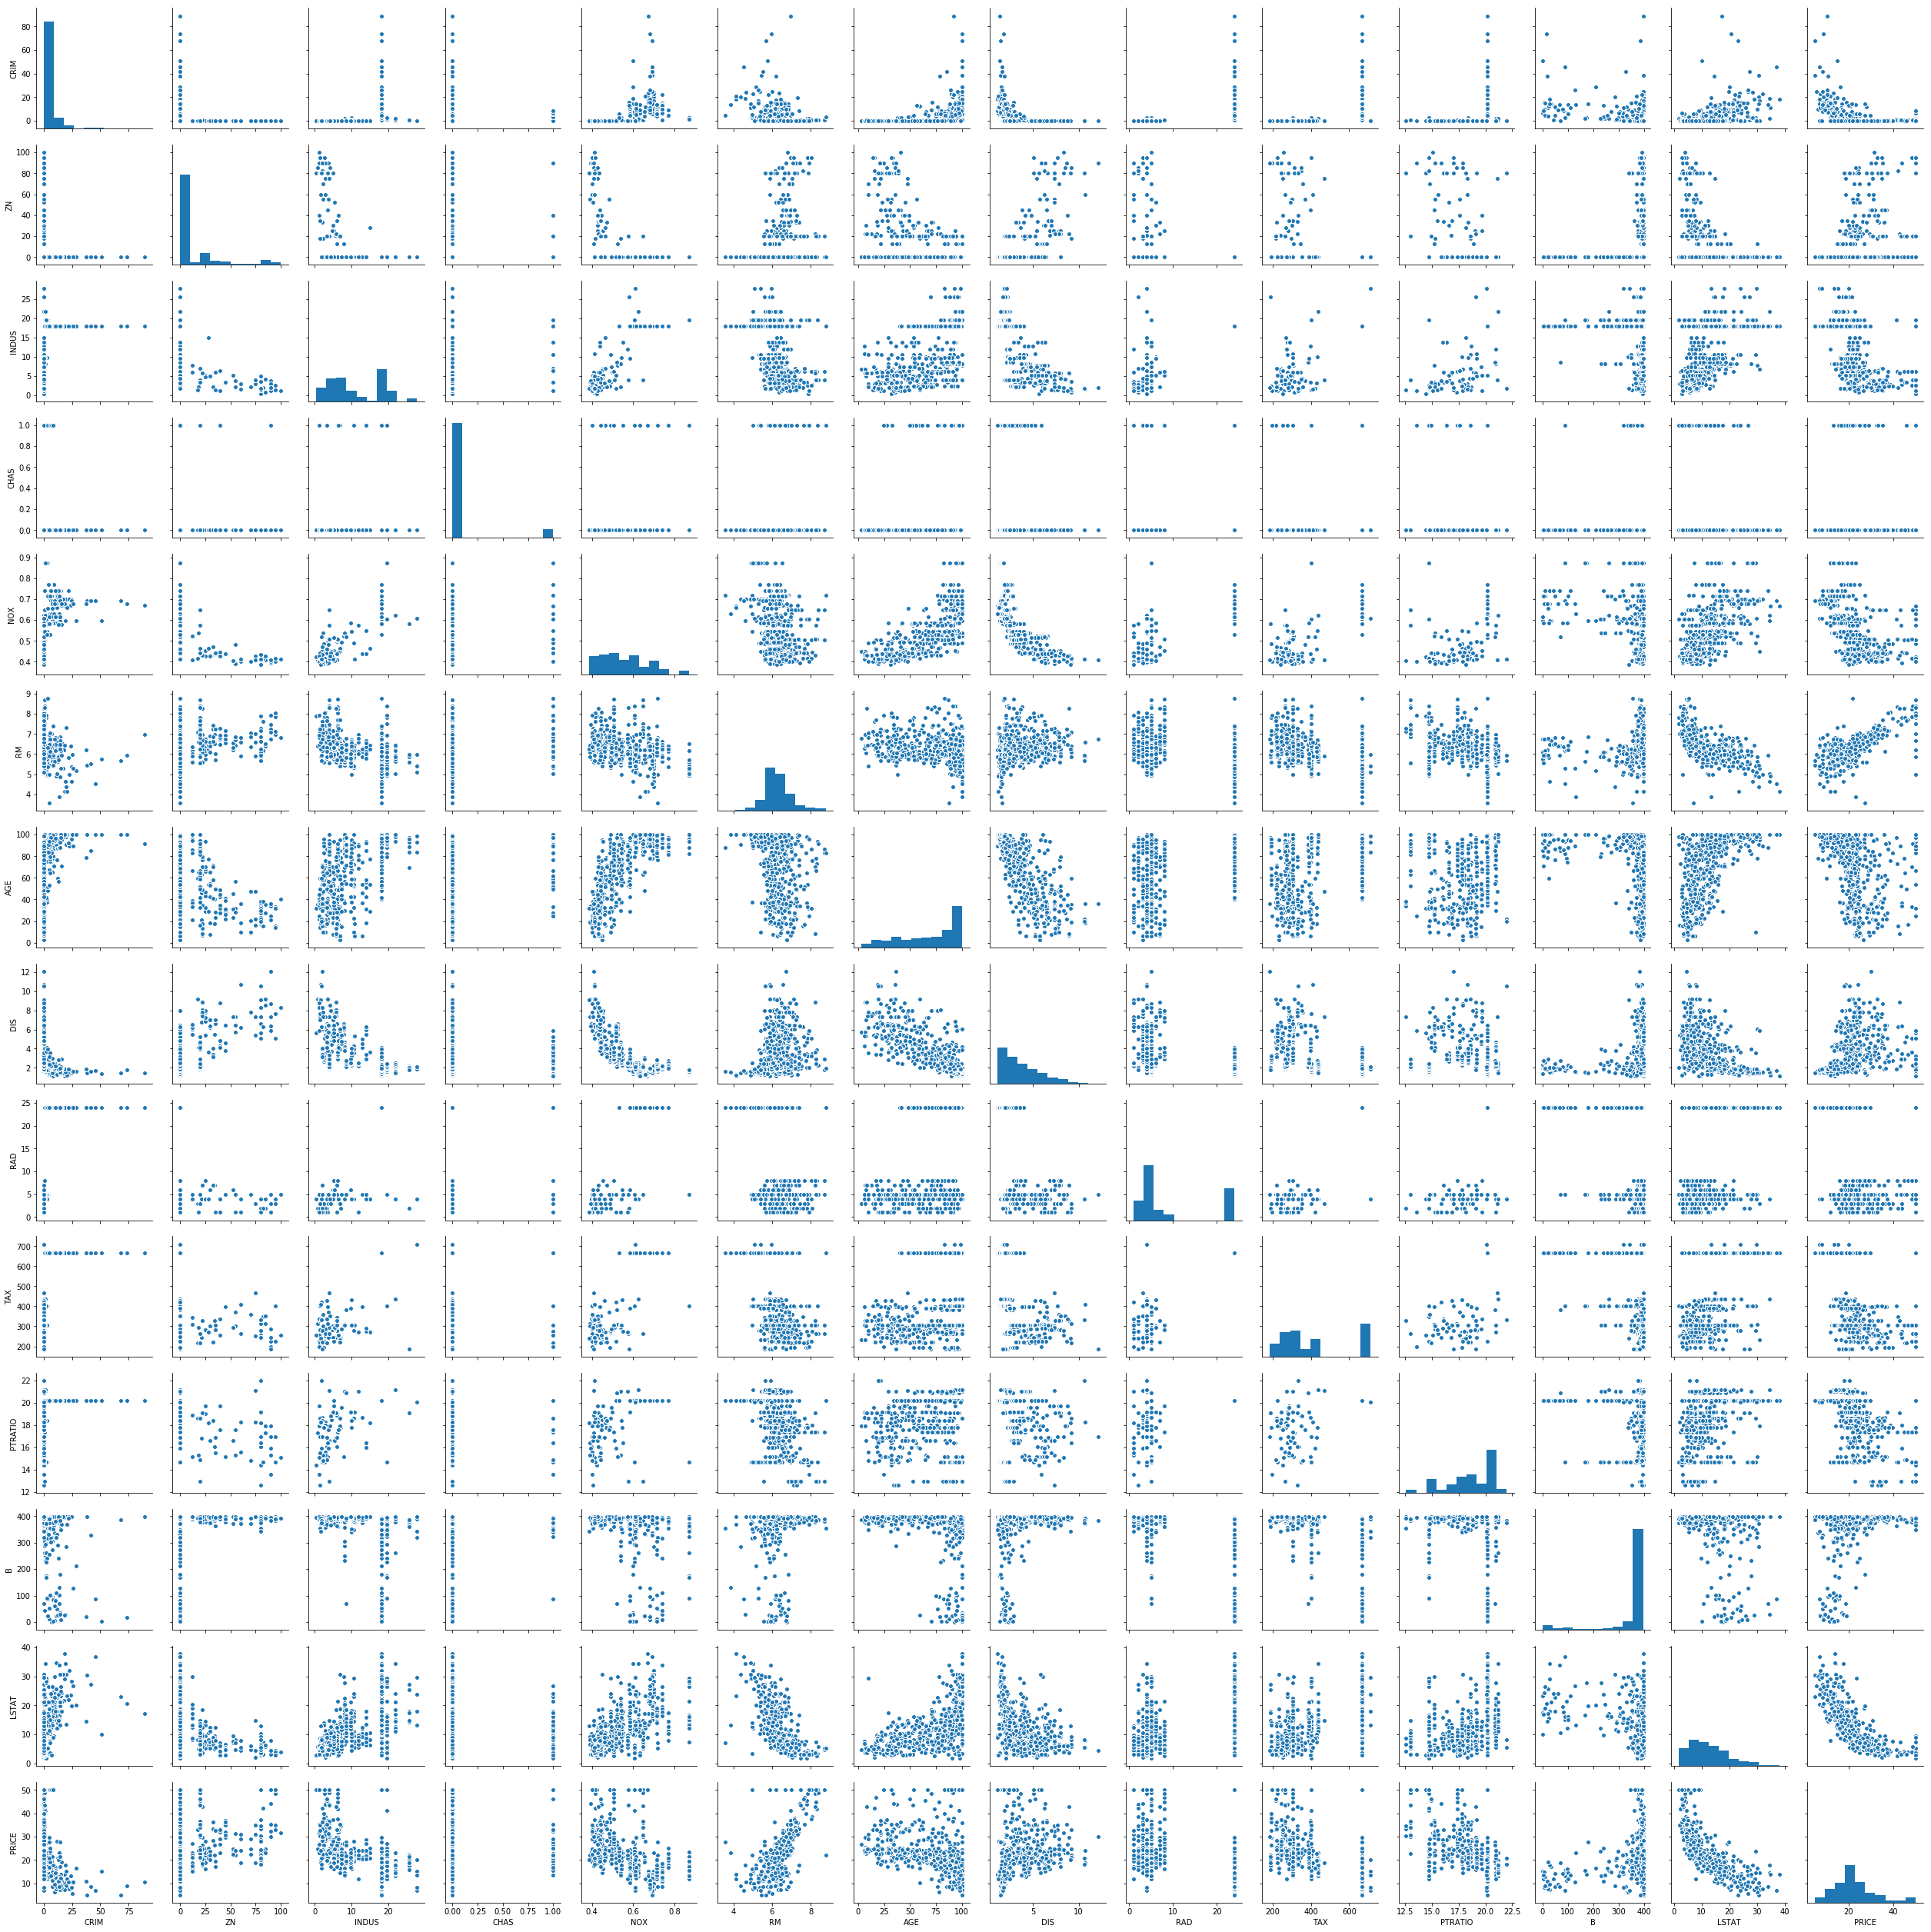

In [79]:
pairplot(bos)

In [80]:
def cutting_function(col_for_del):
    data = bos.drop(col_for_del, axis = 1)  
    labels = bos['PRICE']
    data_train, data_test, labels_train, labels_test = cross_validation.train_test_split(data, labels, test_size = 0.3)
    linear_regressor.fit(data_train, labels_train)      
    
    predictions = linear_regressor.predict(data_test)
    scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = True)
    
    linear_scoring_mse = cross_validation.cross_val_score(linear_regressor, data, labels, scoring = scorer, cv = 10)
    plt.scatter(labels_test, predictions)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    del data, labels
    return('метрика = mse mean: {}, std = {}'.format(linear_scoring_mse.mean(), linear_scoring_mse.std()))

Попробуем убрать признаки NOX и DIS

'метрика = mse mean: 37.409755790012426, std = 50.03251422745279'

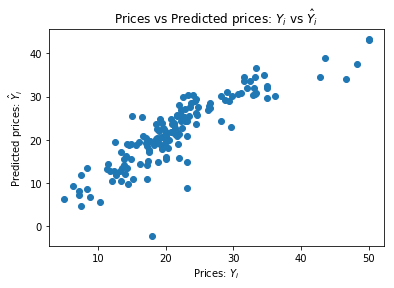

In [81]:
col_for_del = ['PRICE', 'NOX', 'DIS']
cutting_function(col_for_del)

Если посмотреть на результаты выше, то видно, что ошибка и стандартное отклонение от ошибки возрасло. Попробуем убрать другие признаки AGE, B.

'метрика = mse mean: 32.79942998079358, std = 38.17775222125811'

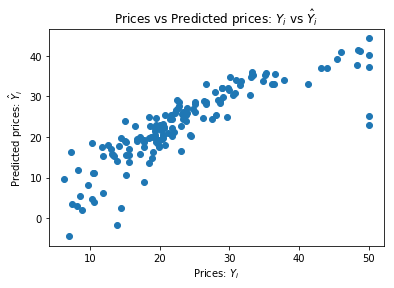

In [82]:
col_for_del = ['PRICE', 'AGE', 'B']
cutting_function(col_for_del)

Как оказалость, отсутствие этих признаков уменьшает ошибку. Попробуем убрать еще признаки PTRATIO, LSTAT.

'метрика = mse mean: 44.19464855862218, std = 52.44629997272333'

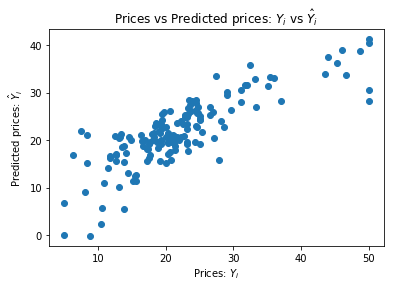

In [83]:
col_for_del = ['PRICE', 'AGE', 'B', 'PTRATIO', 'LSTAT']
cutting_function(col_for_del)

Отсутсвие этих признаков сильно ухудшило качество ответов. Уберем еще  CRIM, RM

'метрика = mse mean: 61.4134683339272, std = 42.27771655661384'

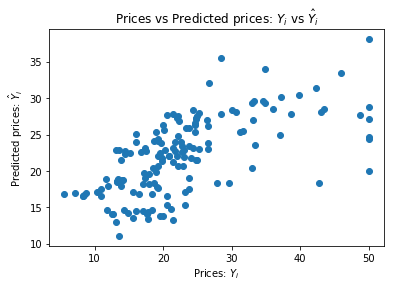

In [84]:
col_for_del = ['PRICE', 'AGE', 'B', 'PTRATIO', 'LSTAT', 'CRIM', 'RM']
cutting_function(col_for_del)

### Ну тут совсем все плохо!

# Решающие деревья

In [85]:
from sklearn.tree import DecisionTreeRegressor

boston_reg_tree = DecisionTreeRegressor(max_depth=6, random_state=17)

boston_reg_tree.fit(data_train, labels_train)
boston_reg_tree_pred = boston_reg_tree.predict(data_test)

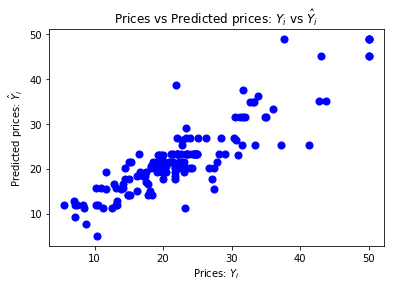

In [86]:
#plt.figure(figsize=(10, 6))
plt.scatter(labels_test, boston_reg_tree_pred, c="b", s=50)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [87]:
scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = True)
tree_scoring_mse = cross_validation.cross_val_score(boston_reg_tree, data, labels, scoring = scorer, 
                                                  cv = 10)
print('метрика = mse mean: {}, std = {}'.format(tree_scoring_mse.mean(), tree_scoring_mse.std()))

метрика = mse mean: 31.391006819774862, std = 26.0182707979672


Видно, что данная модель имеет меньшую ошибку и std от нее, но она очень чувствительна к параметру max_depth, который надо каким-то образом подбирать. 

In [88]:
boston_reg_tree.get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [89]:
parametrs_gird = {
    'max_depth': np.linspace(1, 30,30),
    'min_samples_leaf' : np.linspace(0.01, 0.5,100),
    #'max_features': ['int', 'float', 'auto', 'sqrt', 'log2'],
    'criterion': ['mae', 'mse'],
    'presort': [True, False],
}

In [90]:
grid_cv = grid_search.GridSearchCV(boston_reg_tree, parametrs_gird, scoring = 'neg_mean_squared_error')

In [91]:
%%time
grid_cv.fit(data_train, labels_train)

Wall time: 3min 12s


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30.]), 'min_samples_leaf': array([0.01   , 0.01495, ..., 0.49505, 0.5    ]), 'criterion': ['mae', 'mse'], 'presort': [True, False]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [92]:
grid_cv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4.0, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.01,
           min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
           random_state=17, splitter='best')

In [93]:
boston_reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf = 0.01, min_samples_split = 2, 
                                        presort = True, random_state=17)

boston_reg_tree.fit(data_train, labels_train)
boston_reg_tree_pred = boston_reg_tree.predict(data_test)

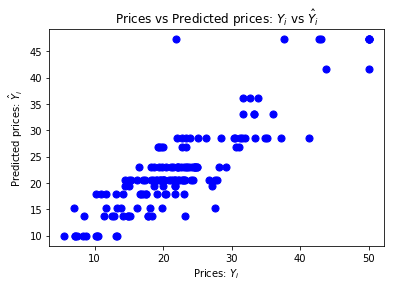

In [94]:
plt.scatter(labels_test, boston_reg_tree_pred, c="b", s=50)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [95]:
scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = True)
tree_scoring_mse = cross_validation.cross_val_score(boston_reg_tree, data, labels, scoring = scorer, 
                                                  cv = 10)
print('метрика = mse mean: {}, std = {}'.format(tree_scoring_mse.mean(), tree_scoring_mse.std()))

метрика = mse mean: 33.56190332561433, std = 28.078503371425196
